In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
import time
import math

%matplotlib inline

In [3]:
df = pd.DataFrame.from_records(pd.read_json('data/daily/aapl.json'))

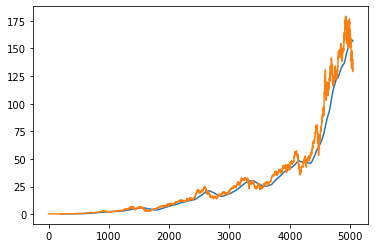

In [5]:
x=[]
n=200
for i in range(len(df)-n):
    x+=[sum(df['low'][i:i+n])/n]
plt.plot([*range(n,len(df['low']))],x)
plt.plot(df['low'][:])

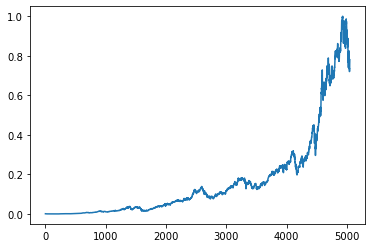

In [6]:
def normalize(v):
    p=[]
    m=max(v)
    n=min(v)
    d=m-n
    for i in range(len(v)):
        p.append((v[i]-n)/d)
    return p

vl=normalize(df['low'])
vh=normalize(df['high'])
plt.plot(vl)

In [7]:
# Gives local min for intervals of n time slots ahead
# O(n)

def findMin(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]>=m:
            c+=1
            if c==n:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        low=True
        if v[len(v)-1]>v[len(v)-j-2]:
            low=False
    if low==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

In [8]:
# Gives local max for intervals of n
def findMax(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]<=m:
            c+=1
            if c==n or j+1==len(v)-1:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        high=True
        if v[len(v)-1]<v[len(v)-j-2]:
            high=False
    if high==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

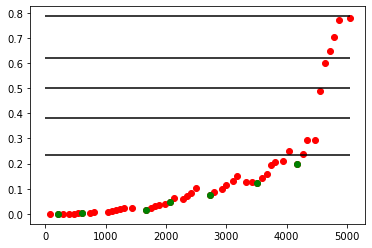

In [9]:
x,y=findMin(range(len(vl)),vl,int(len(vl)/75))
x2,y2=findMin(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(x2,y2,c='g')

plt.plot()
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

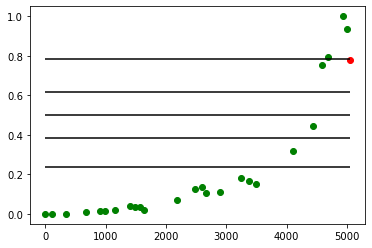

In [10]:
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/75))
x,y=findMax(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(xh,yh,c='g')
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

In [11]:
xl,yl=findMin(range(len(vl)),vl,int(len(vh)/75))
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/75))
print(len(xl))
print(len(xl))

51
51


In [261]:
#O(n+m)

def zipp(lv,hv,liv,hiv,p=0.01):
    c=0
    v=[]
    vi=[]
    li=0
    hi=0
    m=0
    counter = 0
    while li<len(lv) and hi<len(hv):
        m=li
        while liv[li]<hiv[hi]:
            if lv[m]-lv[li]>-p:
                m=li
            li+=1
        v.append(lv[m])
        vi.append(liv[m])

        m=hi
        while hiv[hi]<liv[li]:
            if hv[m]-hv[hi] < p:
                m=hi
            hi+=1
            if hi>=len(hv):
                break
        if hi>=len(hv):
            break
        v.append(hv[m])
        vi.append(hiv[m])
    return vi,v

In [13]:
#O(n)

def unzipp(x,y):
    lv=[]
    hv=[]
    liv=[]
    hiv=[]
    for i in range(len(x)):
        if i%2==0:
            liv.append(x[i])
            lv.append(y[i])
        else:
            hiv.append(x[i])
            hv.append(y[i])  
    return lv,hv,liv,hiv

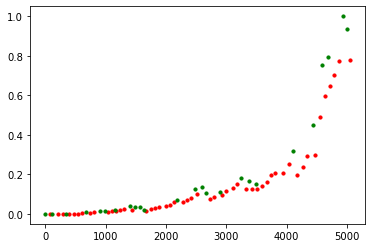

In [14]:
plt.scatter(xl,yl,s=10,c='r')
plt.scatter(xh,yh,s=10,c='g')

In [262]:
X,Y=zipp(yl,yh,xl,xh)
ylow,yhigh,xlow,xhigh=unzipp(X,Y)

In [16]:
len(Y)

39

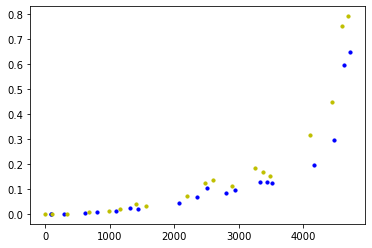

In [263]:
plt.scatter(xlow,ylow,s=10,c='b')
plt.scatter(xhigh,yhigh,s=10,c='y')

In [264]:
def findInc(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]

    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]>=change:
            n=x[i]+1
            m=n-daysbefore
            if m>=0:
                v.append(vec[m:n])
                vi.append(veci[m:n])
                startendx.append([x[i],x[i+1]])
                startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

def findDec(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]
    
    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]<=change:
            n=x[i]+1
            m=n-daysbefore
            if m>=0:
                v.append(vec[m:n])
                vi.append(veci[m:n])
                startendx.append([x[i],x[i+1]])
                startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

In [19]:
def connect_patterns(x, y, dist):
    xy = [x, y]
    print('BEFORE:')
    for i in x:
        print(len(i))
    for i in range(1, len(x)):
        if len(x[i]) < dist:
            for x in xy:
                matches = (j for j in range(len(x[i]), 0, -1) if x[i-1][:j] == x[i][-j:])
                j = next(matches, 0)
                x[i-1] = x[i-1] + x[i][j:]
    print('AFTER:')
    for i in x:
        print(len(i))

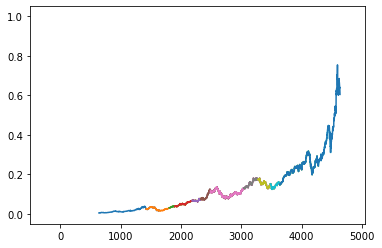

In [20]:
dist = 1000
incy,incx,incsex,incsey=findInc(vh,X,Y,0.025,dist)

for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.xlim([-500, len(vl)])
    plt.ylim([-0.05, 1.05])

BEFORE:
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
AFTER:
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


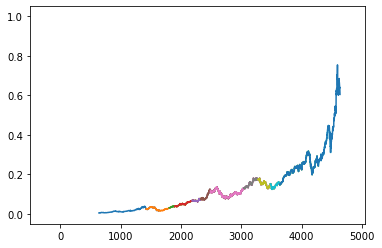

In [21]:
connect_patterns(incx, incy, dist)

for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.xlim([-500, len(vl)])
    plt.ylim([-0.05, 1.05])

In [265]:
pattern_scale_factor = 1
decy,decx,decsex,decsey=findDec(vl,X,Y,0.05,dist)

In [266]:
connect_patterns(decx, decy, dist)

BEFORE:
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
AFTER:
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


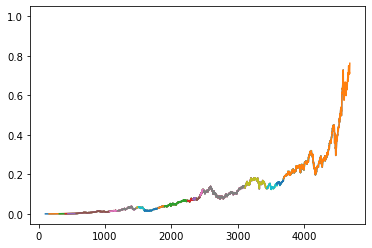

In [267]:
new_decx = []
new_decy = []
for i in range(int(len(decy)/pattern_scale_factor)):
    plt.plot(decx[pattern_scale_factor*i], decy[pattern_scale_factor*i])
    new_decx.append(decx[pattern_scale_factor*i])
    new_decy.append(decy[pattern_scale_factor*i])
    plt.ylim([-0.05, 1.05])
decx = new_decx
decy = new_decy

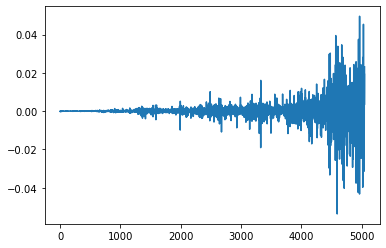

In [268]:
def Differences(v):
    d=[]
    for i in range(len(v)-1):
        d.append(v[i+1]-v[i])
    return d

diff=Differences(vl)
plt.plot(diff)

In [28]:
import os

dist=1000
charts = []
for filename in os.listdir('data/minute'):
    df = pd.DataFrame.from_records(pd.read_json(os.path.join('data/minute', filename))['candles'])
    if len(df['low']) > dist:
        vl=normalize(df['low'])
        vh=normalize(df['high'])
        X,Y=zipp(yl,yh,xl,xh,0.01)
        pattern_scale_factor = 2
        decy,decx,decsex,decsey=findDec(vl,X,Y,0.05,dist)
        for i in decy:
            charts.append(i)

In [29]:
import umap.plot as uplt
import umap.umap_ as umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline

In [269]:
patterns = pd.DataFrame(decy)
patterns = patterns.dropna(axis=0)
patterns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000276,0.000319,0.000316,0.000362,0.000362,0.000397,0.000308,0.000279,0.000240,0.000256,...,0.013530,0.013466,0.013410,0.013320,0.013224,0.013424,0.013651,0.013661,0.013512,0.013486
1,0.000108,0.000123,0.000084,0.000093,0.000144,0.000158,0.000157,0.000133,0.000163,0.000159,...,0.014879,0.014057,0.014632,0.015372,0.015081,0.015464,0.015580,0.015756,0.015730,0.017387
2,0.000966,0.001002,0.001003,0.000967,0.000973,0.000938,0.000937,0.000936,0.000957,0.000938,...,0.025083,0.023703,0.022747,0.023985,0.023428,0.022617,0.021014,0.022651,0.022787,0.022887
3,0.000991,0.001005,0.001036,0.001112,0.001104,0.000976,0.000987,0.000951,0.000969,0.000944,...,0.036227,0.036570,0.035261,0.034386,0.034845,0.035330,0.036640,0.037618,0.038024,0.038219
4,0.001306,0.001301,0.001419,0.001434,0.001442,0.001352,0.001265,0.001304,0.001285,0.001280,...,0.023410,0.023811,0.024087,0.023498,0.022975,0.023023,0.022859,0.021863,0.022021,0.021777
5,0.002225,0.002247,0.002292,0.002252,0.002270,0.002256,0.002202,0.002204,0.002232,0.002364,...,0.032603,0.033370,0.033847,0.034234,0.033677,0.033432,0.033031,0.033390,0.033047,0.033781
6,0.013086,0.012989,0.012995,0.013164,0.013396,0.013362,0.013364,0.013264,0.013548,0.013508,...,0.047966,0.048481,0.048956,0.048377,0.048441,0.047692,0.046375,0.046085,0.046700,0.045758
7,0.015742,0.015851,0.016179,0.016189,0.016191,0.016179,0.016297,0.016379,0.016283,0.016560,...,0.066319,0.067309,0.068133,0.069034,0.069577,0.068205,0.069311,0.069944,0.070112,0.070701
8,0.030888,0.030512,0.031954,0.032496,0.032719,0.033252,0.033639,0.034376,0.034875,0.035101,...,0.119724,0.120573,0.119958,0.118103,0.118591,0.123009,0.121909,0.123186,0.123566,0.123705
9,0.035132,0.035310,0.035804,0.035774,0.033817,0.034470,0.034584,0.032909,0.031733,0.032484,...,0.110775,0.110276,0.110699,0.112214,0.111397,0.110050,0.108882,0.106744,0.104564,0.102979


In [270]:
euclidean005 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

euclidean025 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

euclidean050 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

chebyshev005 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

chebyshev025 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

chebyshev050 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

manhattan005 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

manhattan025 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

manhattan050 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.25,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.001, n_components=2, n_epochs=1000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

mylist = [manhattan005, manhattan025, manhattan050]

add_ons = [euclidean005, euclidean025, euclidean050,
          chebyshev005, chebyshev025, chebyshev050]
for add in add_ons:
    mylist.append(add)

/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


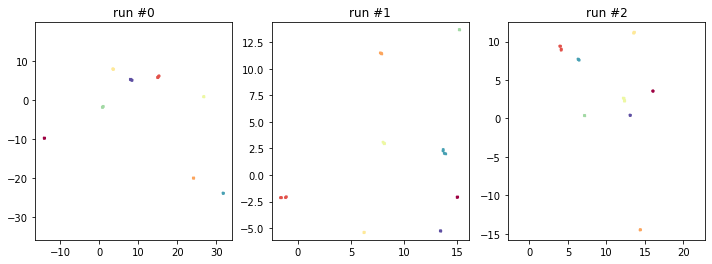

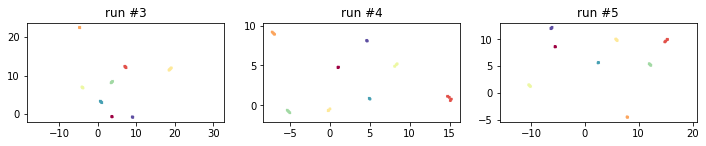

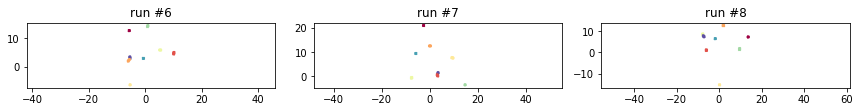

In [271]:
# %matplotlib notebook
results = []
row = 0
for i in range(len(mylist)):
    if i % 3 == 0:
        row = row + 1
        plt.figure(figsize=(12,4))
    plt.subplot(row, 3, i + 1) # plot position count starts at 1
    reducer = mylist[i]
    reducer.fit(patterns)
    embedding = reducer.transform(patterns)
    assert(np.all(embedding == reducer.embedding_))

    Kmean = KMeans(n_clusters=8, random_state=42)
    Kmean.fit(embedding)
    centers = Kmean.cluster_centers_
    
    plt.scatter(embedding[:, 0], embedding[:, 1], c=Kmean.labels_, cmap='Spectral', s=5, marker='x')
    plt.gca().set_aspect('equal', 'datalim')
    title = 'run #' + str(i)
    plt.title(title, fontsize=12)
    
    results.append(Kmean.labels_)
plt.tight_layout()

In [258]:
from collections import defaultdict

def vote_on_labels(labels):
    '''
    Works given equal-length lists within the labels list.
    '''
    # group labelings together.
    results = []
    for label in labels:
        temp_dict = defaultdict(list)
        for index, label in enumerate(label):
            temp_dict[label].append(index)
        results.append(list(temp_dict.values()))
    
    # set value of each index to the labeling group it belongs to.
    # indexes directly represent patterns here.
    marks = []
    for result in results:
        mark = [i for i, res in enumerate(result) for item in res]
        marks.append(mark)
    
    # set the first set of marks as the base comparison.
    base_mark = marks[0]
    marks.remove(base_mark)
    
    # for each pattern, compare its labelings
    # in every model against the base markings.
    # patterns are marked as ambigous when they belong
    # to 2+ different labelings across the models provided.
    ambiguous = set(j for mark in marks for j, item in enumerate(mark) if base_mark[j] != item)
    unambiguous = set(i for i in range(len(patterns))) - ambiguous
    
    return (ambiguous, unambiguous)

In [272]:
ambiguous, unambiguous = vote_on_labels(results)

print('ambiguous: ' + str(ambiguous))
print('-----------------------------------------------------------------------------------------')
print('agreed_upon: ' + str(unambiguous))

ambiguous: {2}
-----------------------------------------------------------------------------------------
agreed_upon: {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


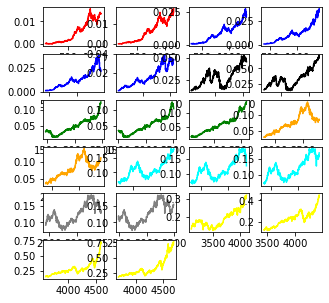

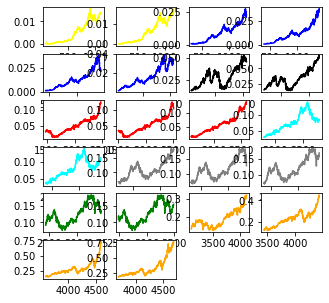

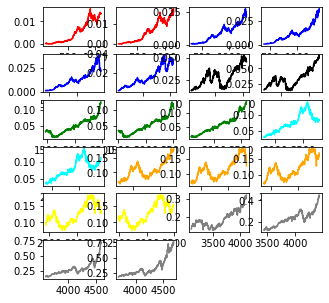

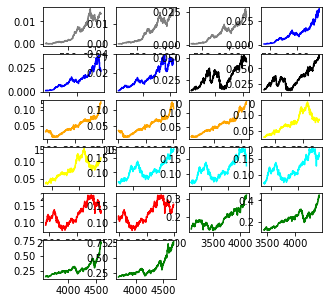

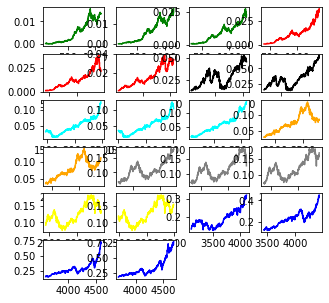

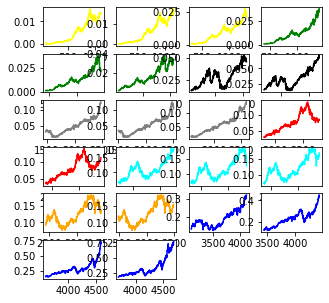

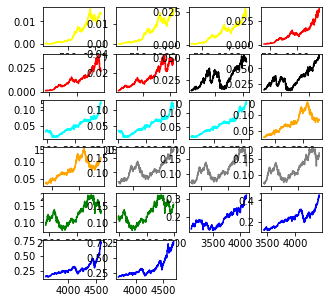

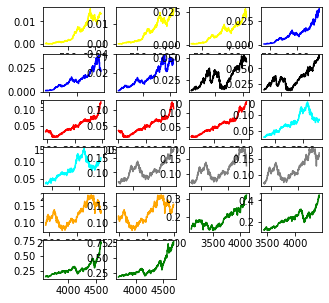

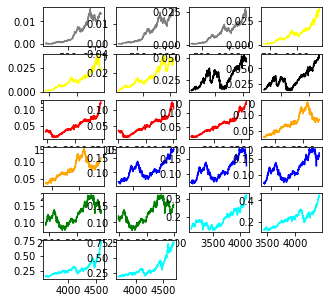

In [273]:
colors = ['black', 'blue', 'red', 'green', 'gray', 'cyan', 'orange', 'yellow']
row = 1
for result in results:
    plt.figure(figsize=(5, 5))
    counter = 0
    for i in range(len(patterns)):
        if counter == len(patterns):
            break
        plt.subplot(6, 4, counter + 1) # plot position count starts at 1
        plt.plot(decx[i], decy[i], c=colors[result[counter]])
        counter = counter + 1